# Answers to challenge questions for wk 9, ecology
No peeking! These are answers to the challenge questions for wk 9. We'll read in our functions first so everything works:

In [21]:
source('https://raw.githubusercontent.com/andrew-hipp/PCM-2018/master/R-tutorials/sources/2018-PCM-09_ecologyImport.r')

## Challenge 1a

In [22]:
library(magrittr)
library(picante)
dat.pd <- apply(dat$composition, 1, function(x) phyD(drop.tip(tr.prairie, names(dat$composition)[is.na(x)]))) %>%
    t %>%
    cbind(., pd.picante = pd(dat$bin, tr.prairie, include.root = F),
             mpd.picante = mpd(dat$bin, cophenetic(tr.prairie)),
             mntd.picante = mntd(dat$bin, cophenetic(tr.prairie)))
head(dat.pd)

,pd,mpd,mntd,pd.picante.PD,pd.picante.SR,mpd.picante,mntd.picante
2,1123.76,231.87,118.43,1123.7578,13,231.8691,118.42571
10,825.51,211.84,96.11,825.5146,11,211.8408,96.11116
14,1217.57,274.98,165.48,1217.5661,11,274.9811,165.47648
15,1270.41,300.56,143.05,1270.4120,12,300.5627,143.05003
22,752.95,277.36,102.89,752.9497,8,277.3595,102.89208
23,1033.47,232.28,114.25,1033.4737,12,232.2761,114.24889


## Challenge 1b

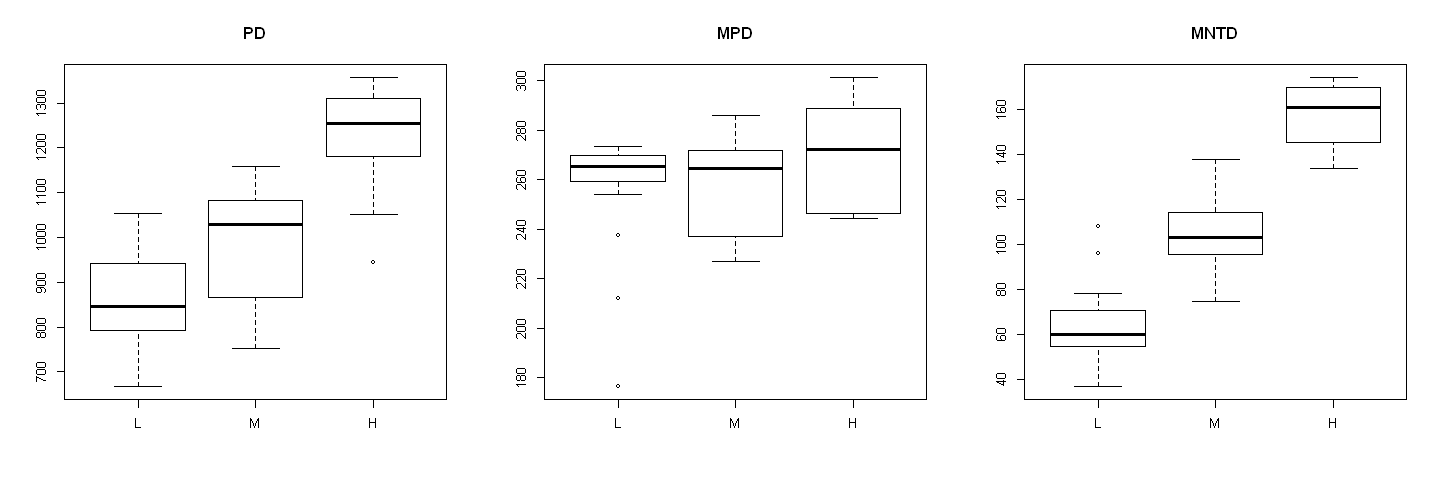

In [23]:
dat.pd$phyD <- dat$plotMeta$phyD
dat.pd$phyD <- factor(dat.pd$phyD, levels = c('L', 'M', 'H')) # for sorting in boxplot

options(repr.plot.width=12, repr.plot.height=4)
layout(matrix(1:3, 1))
boxplot(pd ~ phyD, dat.pd, main = 'PD')
boxplot(mpd ~ phyD, dat.pd, main = 'MPD')
boxplot(mntd ~ phyD, dat.pd, main = 'MNTD')

## Challenge 2

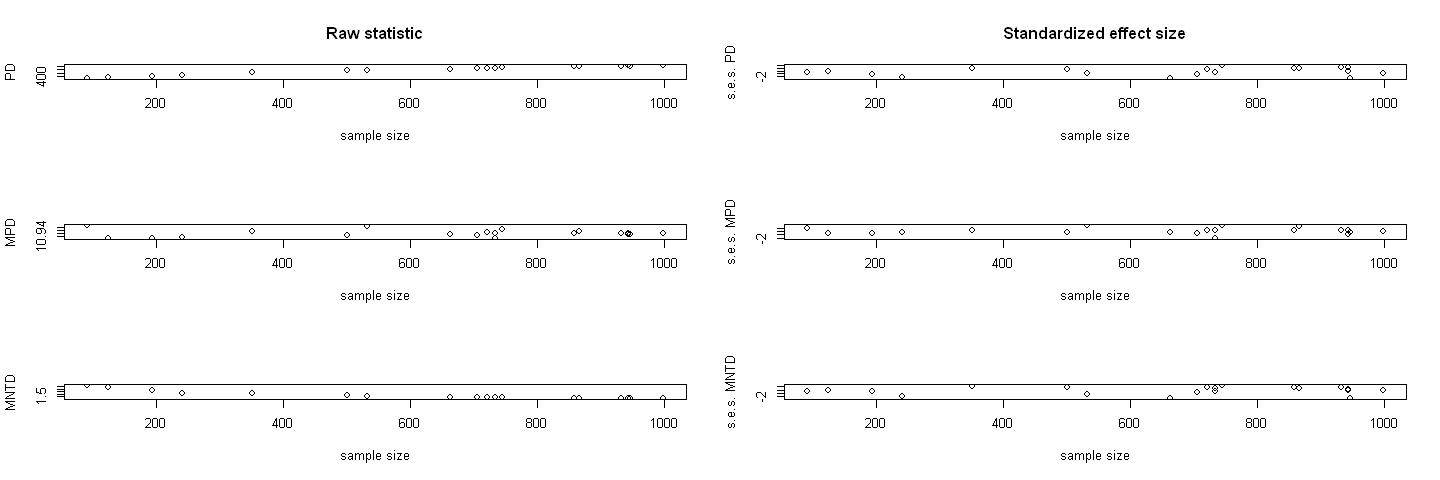

In [24]:
library(geiger)
tr.n = 1000
comm.n = 20

tr <- sim.bdtree(n = tr.n)
comm.rand <- matrix(0, comm.n, tr.n, dimnames = list(NULL, tr$tip.label))

for(i in 1:comm.n) comm.rand[i, sample(tr$tip.label, sample(10:tr.n, 1))] <- 1

layout(matrix(1:6, 3, byrow = T))
plot(apply(comm.rand, 1, sum), pd(comm.rand, tr)$PD, 
     xlab = 'sample size', ylab = 'PD', main = 'Raw statistic')
plot(apply(comm.rand, 1, sum), ses.pd(comm.rand, tr, runs = 50)$pd.obs.z, 
     xlab = 'sample size', ylab = 's.e.s. PD', main = 'Standardized effect size')

plot(apply(comm.rand, 1, sum), mpd(comm.rand, cophenetic(tr)), 
     xlab = 'sample size', ylab = 'MPD')
plot(apply(comm.rand, 1, sum), ses.mpd(comm.rand, cophenetic(tr), runs = 50)$mpd.obs.z, 
     xlab = 'sample size', ylab = 's.e.s. MPD')

plot(apply(comm.rand, 1, sum), mntd(comm.rand, cophenetic(tr)), 
     xlab = 'sample size', ylab = 'MNTD')
plot(apply(comm.rand, 1, sum), ses.mntd(comm.rand, cophenetic(tr), runs = 50)$mntd.obs.z, 
     xlab = 'sample size', ylab = 's.e.s. MNTD')
    

## Challenge 3

In [25]:
beta.phy <- function(comm1, comm2, tr.dist = cophenetic(tr.prairie), metric = c('mntd', 'mpd')) {
    ## comm1 and comm2 are vectors of names
    comm.1_2 <- tr.dist[comm1, comm2]
    if(metric[1] == 'mpd') out <- mean(comm.1_2)
    if(metric[1] == 'mntd') out <- mean(c(apply(comm.1_2, 1, min), apply(comm.1_2, 2, min)))
    out
}     
        
beta.phy.mat <- function(mat, ...) {
    out <- matrix(NA, dim(mat)[1], dim(mat)[1])
    for(i in 1:dim(mat)[1]) {
        for(j in 1:dim(mat)[1]) {
            out[i, j] <- beta.phy(dimnames(mat)[[2]][mat[i, ] == 1],
                                 dimnames(mat)[[2]][mat[j, ] == 1],
                                 ...)
        } # close j
    } # close i
    return(out)
} # close beta.phy.mat

dist.plots.mntd <- beta.phy.mat(dat$bin)

## Challenge 4


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = as.dist(dist.plots.mntd), ydis = dist.plots.soil,      permutations = 200) 

Mantel statistic r: -0.01626 
      Significance: 0.68159 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0435 0.0563 0.0614 0.0766 
Permutation: free
Number of permutations: 200


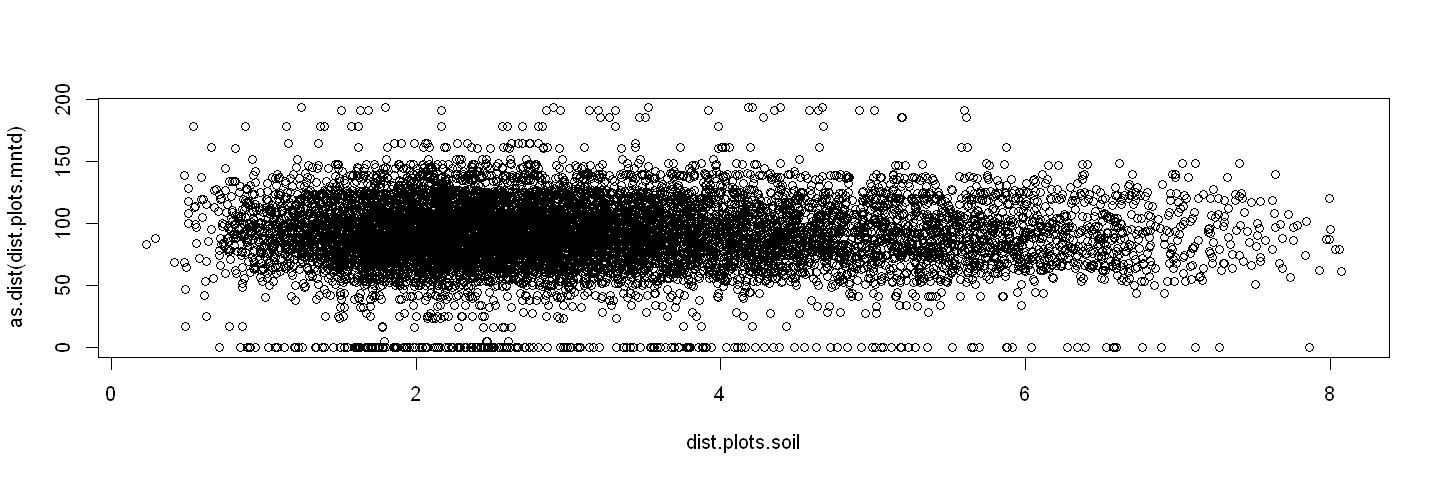

In [26]:
library(vegan)
soilVars <- c("AHOR_cm", "GSM", "LOI", "fWAS", "pH", "EC")
dat$soils <- scale(dat$blocks[ dat$plotMeta$plot, soilVars])
dist.plots.soil <- vegdist(dat$soils, 'euclidean')
out <- mantel(as.dist(dist.plots.mntd), dist.plots.soil, permutations = 200)
out
plot(dist.plots.soil, as.dist(dist.plots.mntd))